In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV ,SGDClassifier
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

In [2]:
print(os.getcwd())
file_path = 'D:/Guana/Documents/9no/IA/datosRendimiento/datasets/datos_CB.csv'
student_data = pd.read_csv(file_path)
student_data.info()

D:\Guana\Documents\9no\IA\datosRendimiento
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97341 entries, 0 to 97340
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  97341 non-null  int64  
 1   Unnamed: 0    97341 non-null  int64  
 2   ciclo         97341 non-null  int64  
 3   Cod.Asign     97341 non-null  int64  
 4   Asignatura    97341 non-null  object 
 5   Cod.Car.Sec   97341 non-null  object 
 6   Cod.Curso     97341 non-null  int64  
 7   Convocatoria  97341 non-null  int64  
 8   Anho          97341 non-null  int64  
 9   Semestre      97341 non-null  int64  
 10  Aprobado      97341 non-null  int64  
 11  Anho.Firma    97341 non-null  int64  
 12  Primer.Par    97341 non-null  int64  
 13  Segundo.Par   97341 non-null  int64  
 14  AOT           97341 non-null  int64  
 15  Primer.Rec    97341 non-null  int64  
 16  Segundo.Rec   97341 non-null  int64  
 17  Nota.Final    97341 non-nu

In [3]:
columns = ['Unnamed: 0.1', 'Unnamed: 0', "Cod.Asign", 'Asis', '4P_60',"Cod.Curso",'Segundo.Par','Primer.Rec','Segundo.Rec','AOT', "Cod.Car.Sec", "Semestre"] #el id_anony podriamos usar despues
if columns[0] in student_data:
    student_data.drop(columns,axis=1, inplace= True)
student_data.head()

,ciclo,Asignatura,Convocatoria,Anho,Aprobado,Anho.Firma,Primer.Par,Nota.Final,id_anony,Nota.Prom
0,1,CALCULO 3,1,2012,0,0,0,[0],es_253,0.0
1,1,FISICA 4,1,2012,0,2012,19,[0],es_254,0.0
2,1,FISICA 4,1,2012,1,2012,17,[3],es_255,3.0
3,1,FISICA 4,1,2012,0,0,0,[0],es_256,0.0
4,1,FISICA 4,1,2012,0,0,16,[0],es_257,0.0


In [4]:
#todo esto puede ser un diccionario con numpy unique y queda re loco
course = "ESTATICA"
condition = student_data["Asignatura"] == course
course_data = student_data[condition]
print(course_data.head())
course_data.drop(["Nota.Prom"],axis=1, inplace = True)
print("\n",len(course_data))
course_data.head()

      ciclo Asignatura  Convocatoria  Anho  Aprobado  Anho.Firma  Primer.Par  \
5258      2   ESTATICA             1  2012         0           0           2   
5259      2   ESTATICA             1  2012         0           0           6   
5260      2   ESTATICA             1  2012         1        2012          12   
5261      2   ESTATICA             1  2012         0           0           1   
5262      2   ESTATICA             1  2012         0           0           0   

     Nota.Final id_anony  Nota.Prom  
5258        [0]   es_469        0.0  
5259        [0]   es_470        0.0  
5260        [2]   es_175        2.0  
5261        [0]   es_910        0.0  
5262        [0]  es_1475        0.0  

 4824


C:\Users\Guana\AppData\Local\Temp\ipykernel_12600\2830960835.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_data.drop(["Nota.Prom"],axis=1, inplace = True)


,ciclo,Asignatura,Convocatoria,Anho,Aprobado,Anho.Firma,Primer.Par,Nota.Final,id_anony
5258,2,ESTATICA,1,2012,0,0,2,[0],es_469
5259,2,ESTATICA,1,2012,0,0,6,[0],es_470
5260,2,ESTATICA,1,2012,1,2012,12,[2],es_175
5261,2,ESTATICA,1,2012,0,0,1,[0],es_910
5262,2,ESTATICA,1,2012,0,0,0,[0],es_1475


In [5]:
def count_attemps(course_data):
    course_data = course_data.sort_values(by=['id_anony','Anho'])
    last_id = course_data['id_anony'].iloc[0]
    counter = 0
    for index,row in course_data.iterrows():
        #print(index)
        if row['id_anony'] == last_id:
            counter += 1 
            course_data.loc[index,['Num.Intento']] = counter
        else:
            last_id = row['id_anony']
            course_data.loc[index,['Num.Intento']] = 1
            counter = 1
    return course_data

In [6]:
course_data = count_attemps(course_data)

In [7]:
course_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4824 entries, 5591 to 25508
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ciclo         4824 non-null   int64  
 1   Asignatura    4824 non-null   object 
 2   Convocatoria  4824 non-null   int64  
 3   Anho          4824 non-null   int64  
 4   Aprobado      4824 non-null   int64  
 5   Anho.Firma    4824 non-null   int64  
 6   Primer.Par    4824 non-null   int64  
 7   Nota.Final    4824 non-null   object 
 8   id_anony      4824 non-null   object 
 9   Num.Intento   4824 non-null   float64
dtypes: float64(1), int64(6), object(3)
memory usage: 543.6+ KB


In [8]:
previous_course = 'ALGEBRA LINEAL 2'
condition = student_data["Asignatura"] == previous_course
previous_course_data = student_data[condition]
print(previous_course_data.head())
previous_course_data = count_attemps(previous_course_data)
previous_course_data = previous_course_data.rename(columns={'Num.Intento':'Num.Intento.Previo'})
previous_course_data = previous_course_data[['Asignatura',"id_anony","Nota.Prom",'Num.Intento.Previo']]
print("\n",len(previous_course_data))
previous_course_data = previous_course_data.rename(columns={'Asignatura':'Asignatura.Previa','Nota.Prom' : 'Nota.Prom.Previo'})

      ciclo        Asignatura  Convocatoria  Anho  Aprobado  Anho.Firma  \
2566      1  ALGEBRA LINEAL 2             1  2012         0           0   
2567      1  ALGEBRA LINEAL 2             1  2012         0        2011   
2568      1  ALGEBRA LINEAL 2             1  2012         0           0   
2569      1  ALGEBRA LINEAL 2             1  2012         0        2011   
2570      1  ALGEBRA LINEAL 2             1  2012         0           0   

      Primer.Par Nota.Final id_anony  Nota.Prom  
2566          10        [0]  es_1102        0.0  
2567           0        [0]    es_97        0.0  
2568           0        [0]  es_1104        0.0  
2569          16     [1, 1]  es_1092        1.0  
2570          14        [0]   es_482        0.0  

 5238


In [9]:
previous_course_data

,Asignatura.Previa,id_anony,Nota.Prom.Previo,Num.Intento.Previo
2575,ALGEBRA LINEAL 2,es_1029,0.0,1.0
16654,ALGEBRA LINEAL 2,es_1029,3.0,2.0
2714,ALGEBRA LINEAL 2,es_1033,0.0,1.0
16769,ALGEBRA LINEAL 2,es_1033,3.0,2.0
2892,ALGEBRA LINEAL 2,es_1044,2.0,1.0
...,...,...,...,...
2567,ALGEBRA LINEAL 2,es_97,0.0,1.0
9770,ALGEBRA LINEAL 2,es_97,2.0,2.0
2823,ALGEBRA LINEAL 2,es_974,0.0,1.0
16982,ALGEBRA LINEAL 2,es_974,0.0,2.0


In [10]:
previous_course_data.info()
previous_course_data.drop(['Asignatura.Previa'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5238 entries, 2575 to 27657
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Asignatura.Previa   5238 non-null   object 
 1   id_anony            5238 non-null   object 
 2   Nota.Prom.Previo    5238 non-null   float64
 3   Num.Intento.Previo  5238 non-null   float64
dtypes: float64(2), object(2)
memory usage: 333.6+ KB


In [11]:
result = previous_course_data[['id_anony','Nota.Prom.Previo']].groupby(['id_anony']).mean()
result2 = previous_course_data[['id_anony','Num.Intento.Previo']].groupby(['id_anony']).max()
result = pd.concat([result,result2],axis=1)
result

,Nota.Prom.Previo,Num.Intento.Previo
id_anony,,
es_1029,1.500000,2.0
es_1033,1.500000,2.0
es_1044,2.000000,1.0
es_1054,1.000000,2.0
es_1057,1.500000,2.0
...,...,...
es_943,0.666667,2.0
es_945,3.000000,1.0
es_953,0.000000,1.0


In [12]:
result = pd.merge(course_data, result, on = 'id_anony', how = 'left')
for col in result.columns:
    print(col,np.unique(result[col]))
result

ciclo [1 2]
Asignatura ['ESTATICA']
Convocatoria [1 2]
Anho [2012 2013 2014 2015 2016 2017 2018 2019 2021]
Aprobado [0 1]
Anho.Firma [   0 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Primer.Par [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Nota.Final ['[0]' '[1, 1, 1]' '[1, 1, 2]' '[1, 1, 3]' '[1, 1, 4]' '[1, 1]'
 '[1, 2, 1]' '[1, 2]' '[1, 3, 1]' '[1, 3]' '[1, 4]' '[1, 5]' '[1]'
 '[2, 1]' '[2]' '[3, 1]' '[3]' '[4, 1]' '[4]' '[5]']
id_anony ['es_1003' 'es_1026' 'es_104' ... 'es_937' 'es_943' 'es_953']
Num.Intento [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
Nota.Prom.Previo [0.         0.11111111 0.125      0.14285714 0.16666667 0.2
 0.22222222 0.25       0.28571429 0.33333333 0.375      0.4
 0.42857143 0.44444444 0.5        0.57142857 0.6        0.625
 0.66666667 0.75       0.8        0.83333333 0.83333333 0.875
 0.9        1.         1.11111111 1.125      1.16666667 1.25
 1.33333333 1.5        1.66666667 1.75       2.         2.33333333
 2.5    

,ciclo,Asignatura,Convocatoria,Anho,Aprobado,Anho.Firma,Primer.Par,Nota.Final,id_anony,Num.Intento,Nota.Prom.Previo,Num.Intento.Previo
0,2,ESTATICA,1,2012,0,0,6,[0],es_1003,1.0,NaN,NaN
1,2,ESTATICA,1,2013,1,2013,6,"[1, 2]",es_1003,2.0,NaN,NaN
2,2,ESTATICA,1,2012,1,2012,15,[2],es_1026,1.0,NaN,NaN
3,2,ESTATICA,1,2012,0,2011,10,[1],es_104,1.0,NaN,NaN
4,2,ESTATICA,1,2013,1,2013,8,[2],es_104,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4819,2,ESTATICA,1,2012,1,2012,16,[2],es_93,1.0,NaN,NaN
4820,2,ESTATICA,1,2013,0,0,0,[0],es_937,1.0,NaN,NaN
4821,2,ESTATICA,1,2012,0,0,3,[0],es_943,1.0,0.666667,2.0
4822,2,ESTATICA,1,2013,1,2013,9,[2],es_943,2.0,0.666667,2.0


In [13]:
print(np.mean(result['Nota.Prom.Previo']),np.mean(result['Num.Intento.Previo']))

1.9052710303304832 1.7997621878715815


In [14]:
result['Nota.Prom.Previo'] = result['Nota.Prom.Previo'].fillna(result['Primer.Par']/24*5) #sacamos promediando de su puntaje de primer par
result['Num.Intento.Previo'] = result['Num.Intento.Previo'].fillna(np.mean(result['Num.Intento.Previo']))
print(result)
print(np.mean(result['Nota.Prom.Previo']),np.mean(result['Num.Intento.Previo']))



      ciclo Asignatura  Convocatoria  Anho  Aprobado  Anho.Firma  Primer.Par  \
0         2   ESTATICA             1  2012         0           0           6   
1         2   ESTATICA             1  2013         1        2013           6   
2         2   ESTATICA             1  2012         1        2012          15   
3         2   ESTATICA             1  2012         0        2011          10   
4         2   ESTATICA             1  2013         1        2013           8   
...     ...        ...           ...   ...       ...         ...         ...   
4819      2   ESTATICA             1  2012         1        2012          16   
4820      2   ESTATICA             1  2013         0           0           0   
4821      2   ESTATICA             1  2012         0           0           3   
4822      2   ESTATICA             1  2013         1        2013           9   
4823      2   ESTATICA             1  2014         0           0          10   

     Nota.Final id_anony  Num.Intento  

In [15]:
y = result['Aprobado']
result.drop(['ciclo','Asignatura','Aprobado','Anho.Firma','Nota.Final','id_anony'],axis=1,inplace = True)
result

,Convocatoria,Anho,Primer.Par,Num.Intento,Nota.Prom.Previo,Num.Intento.Previo
0,1,2012,6,1.0,1.250000,1.799762
1,1,2013,6,2.0,1.250000,1.799762
2,1,2012,15,1.0,3.125000,1.799762
3,1,2012,10,1.0,2.083333,1.799762
4,1,2013,8,2.0,1.666667,1.799762
...,...,...,...,...,...,...
4819,1,2012,16,1.0,3.333333,1.799762
4820,1,2013,0,1.0,0.000000,1.799762
4821,1,2012,3,1.0,0.666667,2.000000
4822,1,2013,9,2.0,0.666667,2.000000


### Here, it could be useful to repeat this proccess (with a function) and add data for another course like Fisica 1

In [91]:
X_train, X_test, y_train, y_test = train_test_split(result, y, random_state=10)

# Pipeline and Gridsearch

In [95]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import learning_curve

from tempfile import mkdtemp
from shutil import rmtree

In [105]:
def hyperparam_search(x,y):
    std_slc = StandardScaler()
    pca = decomposition.PCA()
    logistic_Reg = linear_model.LogisticRegression(solver='liblinear',max_iter=1000)
    cachedir = mkdtemp()

    pipe = Pipeline(steps = [('scaler', StandardScaler()), ('pca', pca), ('logistic_Reg', logistic_Reg)],memory=cachedir)
    n_components = list(range(1,X_train.shape[1]+1,1))

    C = np.logspace(-4, 4, 1000)
    #C = [0.001, 0.01, 0.1, 1, 10, 100]
    penalty = ['l1', 'l2']

    parameters = [
        {'logistic_Reg__solver' : ['liblinear'],
            'pca__n_components' : n_components,
                          'scaler' : [StandardScaler(), MinMaxScaler()],
                          'logistic_Reg__C' : C,
                          'logistic_Reg__penalty' : penalty[0:2]},
        {'logistic_Reg__solver' : ['newton-cg', 'lbfgs','newton-cholesky'],
            'pca__n_components' : n_components,
                          'scaler' : [StandardScaler(), MinMaxScaler()],
                          'logistic_Reg__C' : C,
                          'logistic_Reg__penalty' : penalty[1:]}
                      ]


    clf_GS = GridSearchCV(pipe, parameters, scoring = 'accuracy', n_jobs=-1)
    clf_GS.fit(x, y)
    
    best_parameters = clf_GS.best_estimator_.get_params()
    for param_name in sorted(parameters[0].keys()):
        print(f"{param_name}: {best_parameters[param_name]}")
    print(f"best score: {clf_GS.best_score_}")
    print(clf_GS.best_estimator_.get_params()['logistic_Reg'])
    
    #print('Best scaler:',clf_GS.best_estimator_.get_params()['scaler'])
    #print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
    #print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
    #print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
    #print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

In [106]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')    
hyperparam_search(X_train,y_train)

logistic_Reg__C: 0.01
logistic_Reg__penalty: l2
logistic_Reg__solver: liblinear
pca__n_components: 6
scaler: StandardScaler()
best score: 0.776116243705249
LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')


# Without tuning

In [65]:
LR = linear_model.LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.7810945273631841

# Old parameters attemp

In [41]:
n = 6
scaler = MinMaxScaler()
pca = decomposition.PCA(n_components=n)
logistic_Reg = linear_model.LogisticRegression(C=0.12648552168552957, solver='liblinear', penalty = 'l2')


pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('logistic_Reg', logistic_Reg)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7802653399668324

# Attemp 2

In [42]:
n = 6
scaler = MinMaxScaler()
pca = decomposition.PCA(n_components=n)
logistic_Reg = linear_model.LogisticRegression(C=0.02811768697974228, solver='newton-cg')

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('logistic_Reg', logistic_Reg)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7736318407960199

# Attemp 3

In [62]:
#without PCA
scaler = StandardScaler()
logistic_Reg = linear_model.LogisticRegression(C=0.02811768697974228, solver='newton-cg')

pipe = Pipeline(steps=[('scaler', scaler), ('logistic_Reg', logistic_Reg)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7777777777777778

# Attemp 4

In [68]:
scaler = StandardScaler()
logistic_Reg = linear_model.LogisticRegression(C=0.03199267137797385, solver='liblinear')

pipe = Pipeline(steps=[('scaler', scaler), ('logistic_Reg', logistic_Reg)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7777777777777778

# Attemp 5

In [93]:
scaler = StandardScaler()
logistic_Reg = linear_model.LogisticRegression(C=0.03199267137797385, solver='newton-cg')

pipe = Pipeline(steps=[('scaler', scaler), ('logistic_Reg', logistic_Reg)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7885572139303483

In [125]:
scaler = StandardScaler()
logistic_Reg = linear_model.LogisticRegression(C=0.00911, solver='newton-cg')

pipe = Pipeline(steps=[('scaler', scaler), ('logistic_Reg', logistic_Reg)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7985074626865671

# Learning curve for no tuning and tuned 

D:\ProgramData\Anaconda3\envs\IA2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\envs\IA2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

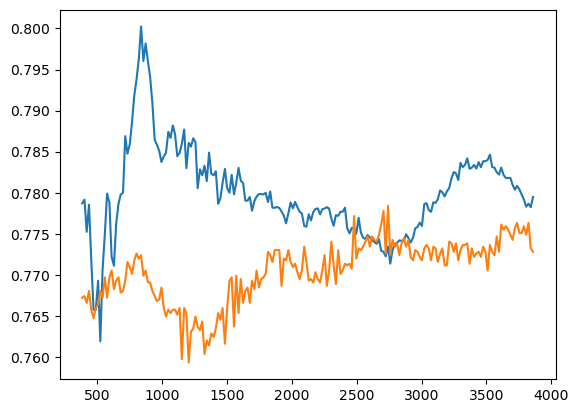

In [126]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(LR, result, y, return_times=True, train_sizes=np.linspace(0.1, 1.0, 200))
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))

D:\ProgramData\Anaconda3\envs\IA2023\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\IA2023\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\IA2023\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\IA2023\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ProgramData\Anaconda3\envs\IA2023\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line 

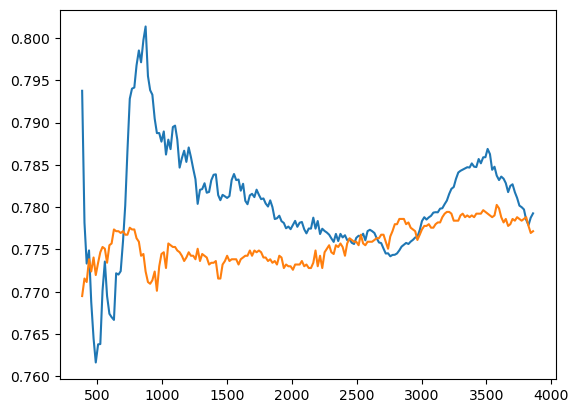

In [127]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(logistic_Reg, result, y, return_times=True, train_sizes=np.linspace(0.1, 1.0, 200))
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
